## Jae Wook Jung
## 151342596

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1Q)

In [2]:
POP = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\midexam\population.csv", header = 0, names = ["Date", "POP"])
TFP = pd.read_csv(r"C:\Users\Jae\Desktop\Econ 381\homework\W07\TFP.csv", header = 0, names = ["Date", "TFP"])

Date_pop = np.array(POP["Date"], dtype = np.datetime64)
Date_tfp = np.array(TFP["Date"], dtype = np.datetime64)
print(POP['POP'])
print(TFP['TFP'])
print(POP['POP'][57])   ## 2017/01/01
print(POP['POP'][8]) 
print(TFP['TFP'][63])   ## 2017/01/01
print(TFP['TFP'][14])

n = (float(POP['POP'][57]) / float(POP['POP'][8]))**(1/50) - 1
g = (TFP['TFP'][63] / TFP['TFP'][14])**(1/50) - 1
print(n)
print(g)
print("population growth rate: ", '{:.2f}'. format(n))
print("TFP growth rate: ", '{:.2f}'. format(g))


0     101908250.000000000000
1     103084250.000000000000
2     103598750.000000000000
3     105470416.666666666667
4     107333750.000000000000
               ...          
56        205502750.00000000
57        205537500.00000000
58        206507750.00000000
59        206269916.66666667
60                         .
Name: POP, Length: 61, dtype: object
0     0.667344
1     0.689067
2     0.684990
3     0.692469
4     0.693722
        ...   
59    1.007524
60    1.013102
61    1.021562
62    1.022072
63    1.030535
Name: TFP, Length: 64, dtype: float64
205537500.00000000
113688166.66666667
1.0305346250534058
0.7937018871307373
0.011913794134144284
0.005236162356891727
population growth rate:  0.01
TFP growth rate:  0.01


# Q2)

In [3]:
s=0.1
d=0.06
alpha=0.33
l=0.01

k_star = (1 - l) * (s / (d + g + n))**(1 / (1 - alpha))
print(k_star)
print("k_star = "'{:.2f}'. format(k_star))

1.458112012665608
k_star = 1.46


# Q3)

[1.17647059 1.19050739 1.20387226 1.21659434 1.22870189 1.2402222
 1.25118163 1.26160561 1.27151861 1.28094418 1.28990495 1.29842263
 1.30651807 1.31421125 1.32152129 1.32846653 1.33506448 1.34133189
 1.34728478 1.35293844 1.35830748 1.36340583 1.36824679 1.37284304
 1.37720667 1.38134918 1.38528158 1.3890143  1.3925573  1.39592007
 1.39911163 1.40214055 1.40501501 1.40774279 1.41033127 1.41278747
 1.41511809 1.41732947 1.41942766 1.42141839 1.42330711 1.42509901
 1.42679901 1.42841179 1.42994179 1.43139323 1.43277012 1.43407626
 1.43531527 1.43649058 1.43760544 1.43866296 1.43966606 1.44061753
 1.44152003 1.44237606 1.443188   1.44395812 1.44468856 1.44538137
 1.44603847 1.4466617  1.4472528  1.44781342 1.44834514]
1.458112012665608
1.448345139609795
0.009766873055812919
reaching to the steady-state at 65 years with 0.01 difference to the steady-state.


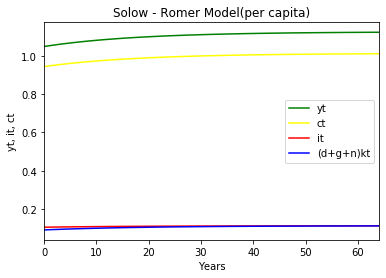

In [4]:
# 3 - 1

K0=1000
L0=500
A0=1.7

def L(L0, n, time):
    return L0 * (1 + n)**(time)

def A(A0, g, time):
    return A0 * (1 + g)**(time)

def output_per_person(l, alpha, capital_per_person):
    return  pow(capital_per_person, alpha) * pow(1- l, 1- alpha)

def sr_function_output(l, K, alpha, A, L):
    return pow(1- l, 1 - alpha) * pow(K, alpha) * pow(A, 1 - alpha) * pow(L, 1 - alpha)

time = 0
population = [L0]
knowledge = [A0]
capital = [K0]
capital_p = [capital[0] / (knowledge[0] * population[0])]
output = [sr_function_output(l, capital[0], alpha, knowledge[0], population[0])]
output_p = [output_per_person(l, alpha, capital_p[0])]
investment = [s * output[0]]
investment_p = [s * output_p[0]]
depreciation = [(d + g + n) * capital[0]]
depreciation_p = [(d + g + n) * capital_p[0]]
consumption = [output[0] - investment[0]]
consumption_p = [output_p[0] - investment_p[0]]
change_in_capital = [investment[0] - depreciation[0]]
change_in_capital_p = [investment_p[0] - depreciation_p[0]]
i = 0

while (abs(k_star - capital_p[i])) > 0.01:
    i += 1
    time = np.append(time, i)
    population = np.append(population, L(L0, n, time[i]))    # population[i - 1] * (1 + n)
    knowledge = np.append(knowledge, A(A0, g, time[i]))  # knowledge[i - 1] * (1 + g)
    capital_p = np.append(capital_p, capital_p[i - 1] + change_in_capital_p[i - 1])
    output_p = np.append(output_p, output_per_person(l, alpha, capital_p[i]))
    investment_p = np.append(investment_p, s * output_p[i])
    depreciation_p = np.append(depreciation_p, (d + g + n) * capital_p[i])
    consumption_p = np.append(consumption_p, output_p[i] - investment_p[i])
    change_in_capital_p = np.append(change_in_capital_p, investment_p[i] - depreciation_p[i])

print(capital_p)
print(k_star)
print(capital_p[len(time) - 1])
print(k_star - capital_p[len(time) - 1])
print("reaching to the steady-state at", len(time), "years with 0.01 difference to the steady-state.")
plt.plot(time, output_p, 'green', label = 'yt')
plt.plot(time, consumption_p, 'yellow', label = 'ct')
plt.plot(time, investment_p, 'red', label = 'it')
plt.plot(time, depreciation_p, 'blue', label = '(d+g+n)kt')
plt.title("Solow - Romer Model(per capita)")
plt.xlabel("Years")
plt.ylabel("yt, it, ct")
plt.xlim(0,i)
plt.legend()
plt.show()

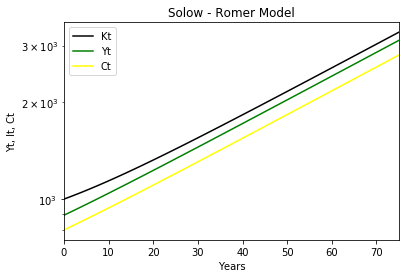

In [5]:
# 3 - 2

time = 0
population = [L0]
knowledge = [A0]
capital = [K0]
output = [sr_function_output(l, capital[0], alpha, knowledge[0], population[0])]
investment = [s * output[0]]
depreciation = [(d + g + n) * capital[0]]
consumption = [output[0] - investment[0]]
change_in_capital = [investment[0] - depreciation[0]]
i = 0

for i in range(0, 75):
    i += 1
    time = np.append(time, i)
    population = np.append(population, L(L0, n ,time[i]))
    knowledge = np.append(knowledge, A(A0, g, time[i]))
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1])
    output = np.append(output, sr_function_output(l, capital[i], alpha, knowledge[i], population[i]))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, (d + g + n) * capital[i])
    consumption = np.append(consumption, output[i] - investment[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])
     
plt.plot(time, capital, 'black', label = 'Kt')
plt.plot(time, output, 'green', label = 'Yt')
plt.plot(time, consumption, 'yellow', label = 'Ct')
plt.title("Solow - Romer Model")
plt.xlabel("Years")
plt.ylabel("Yt, It, Ct")
plt.yscale("log")
plt.xlim(0,i)
plt.legend()
plt.show()

In [6]:
# 3 - 3

print(capital[65])
print(population[65])
print(knowledge[65])

2786.2237744698423
1079.6886924106086
2.3871276837352613


# Q4)

k_star_new = 4.102885421661664
[  2786.22377447   2833.94102564   2882.49065957   2931.88649409
   2982.14260834   3033.27334625   3085.29332001   3138.21741371
   3192.06078711   3246.83887942   1623.41943971   1680.11442534
   2352.66631839   3077.90645412   3842.66337754   4636.96922406
   5453.11469196   6285.05118072   7127.99027548   7978.12296442
   8832.41553532   9688.45682767  10544.34118689  11398.57702733
  12250.01425604  13097.78590317  13941.26066056  14780.00393492
  15613.74564256  16442.35340748  17265.81013686  18084.1951756
  18897.66841101  19706.45682634  20510.84309968  21311.15592023
  22107.76175358  22901.05783448  23691.46620302  24479.42863075
  25265.40230772  26049.85618156  26833.26785658  27616.12097436
  28398.90300913  29182.10342066  29966.21211546  30751.71817432
  31539.10880958  32328.86852079  33121.47842159  33917.41571423
  34717.15329142  35521.15944762  36329.89768456  37143.82659747
  37963.39983049  38789.06609104  39621.26921447  40460.4482

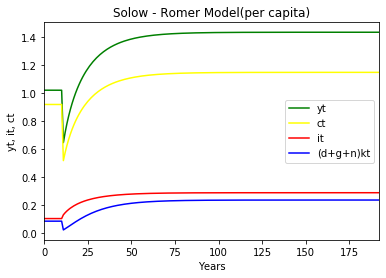

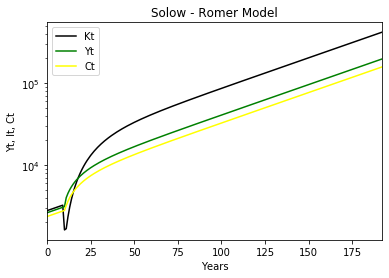

In [7]:
# 4 - 1
# years need to reach to the new k_star

def L(L0, n, time):
    return L0 * (1 + n)**(time)

def A(A0, g, time):
    return A0 * (1 + g)**(time)

s = 0.1
d = 0.06
alpha = 0.33
l = 0.01
K1 = capital[65]
L1 = population[65]
A1 = knowledge[65]

time = 0
population1 = [L1]
knowledge1 = [A1]
capital1 = [K1]
capital_p1 = [capital1[0] / (knowledge1[0] * population1[0])]
output1 = [sr_function_output(l, capital1[0], alpha, knowledge1[0], population1[0])]
output_p1 = [output_per_person(l, alpha, capital_p1[0])]
investment1 = [s * output1[0]]
investment_p1 = [s * output_p1[0]]
depreciation1 = [(d + g + n) * capital1[0]]
depreciation_p1 = [(d + g + n) * capital_p1[0]]
consumption1 = [output1[0] - investment1[0]]
consumption_p1 = [output_p1[0] - investment_p1[0]]
change_in_capital1 = [investment1[0] - depreciation1[0]]
change_in_capital_p1 = [investment_p1[0] - depreciation_p1[0]]
i = 0

for i in range(0, 10):
    i += 1
    time = np.append(time, i)
    population1 = np.append(population1, L(L1, n, time[i]))
    knowledge1 = np.append(knowledge1, A(A1, g, time[i]))
    capital1 = np.append(capital1, capital1[i - 1] + change_in_capital1[i - 1])
    capital_p1 = np.append(capital_p1, capital1[i] / (knowledge1[i] * population1[i]))
    output1 = np.append(output1, sr_function_output(l, capital1[i], alpha, knowledge1[i], population1[i]))
    output_p1 = np.append(output_p1, output_per_person(l, alpha, capital_p1[i]))
    investment1 = np.append(investment1, s * output1[i])
    investment_p1 = np.append(investment_p1, s * output_p1[i])
    depreciation1 = np.append(depreciation1, (d + g + n) * capital1[i])
    depreciation_p1 = np.append(depreciation_p1, (d + g + n) * capital_p1[i])
    consumption1 = np.append(consumption1, output1[i] - investment1[i])
    consumption_p1 = np.append(consumption_p1, output_p1[i] - investment_p1[i])
    change_in_capital1 = np.append(change_in_capital1, investment1[i] - depreciation1[i])

capital1[10] = (capital1[9] / 2)
s2 = s * 2
A2 = knowledge1[10] * 2
k_star_new = (1 - l) * (s2 / (d + g + n))**(1/ (1 - alpha))
print("k_star_new =", k_star_new)

while (abs(k_star_new - capital_p1[i])) > 1.0652:
    i += 1
    time = np.append(time, i)
    population1 = np.append(population1, L(L1, n, time[i]))
    knowledge1 = np.append(knowledge1, A(A2, g, time[i - 10]))
    capital1 = np.append(capital1, capital1[i - 1] + change_in_capital1[i - 1])
    capital_p1 = np.append(capital_p1, capital1[i] / (knowledge1[i] * population1[i]))
    output1 = np.append(output1, sr_function_output(l, capital1[i], alpha, knowledge1[i], population1[i]))
    output_p1 = np.append(output_p1, output_per_person(l, alpha, capital_p1[i]))
    investment1 = np.append(investment1, s2 * output1[i])
    investment_p1 = np.append(investment_p1, s2 * output_p1[i])
    depreciation1 = np.append(depreciation1, (d + g + n) * capital1[i])
    depreciation_p1 = np.append(depreciation_p1, (d + g + n) * capital_p1[i])
    consumption1 = np.append(consumption1,output1[i] - investment1[i])
    consumption_p1 = np.append(consumption_p1, output_p1[i] - investment_p1[i])
    change_in_capital1 = np.append(change_in_capital1, investment1[i] - depreciation1[i])

print(capital1)
print("reaching the the new k_star takes ", len(time) - 10, "years with 1.0652 value difference to the new steady-state")

plt.plot(time, output_p1, 'green', label = 'yt')
plt.plot(time, consumption_p1, 'yellow', label = 'ct')
plt.plot(time, investment_p1, 'red', label = 'it')
plt.plot(time, depreciation_p1, 'blue', label = '(d+g+n)kt')
plt.title("Solow - Romer Model(per capita)")
plt.xlabel("Years")
plt.ylabel("yt, it, ct")
plt.xlim(0,i)
plt.legend()
plt.show()

plt.plot(time, capital1, 'black', label = 'Kt')
plt.plot(time, output1, 'green', label = 'Yt')
plt.plot(time, consumption1, 'yellow', label = 'Ct')
plt.title("Solow - Romer Model")
plt.xlabel("Years")
plt.ylabel("Yt, It, Ct")
plt.yscale("log")
plt.xlim(0,i)
plt.legend()
plt.show()

In [8]:
print("Q5)\nThe new steady-state is larger than the old steady-state. To reach to the new steady-state takes 183 years with the 1.0652 value difference to the new steady-state. Capital became smaller which makes output per person lower than the old steady-state. The saving rate got doubled, which makes poor right now. Knowledge doubled which makes growth faster. In the beginning the economy output per person will be lower than old steady-state output per person, but the economy will grow faster and become slower when it is about to reach to the new steady-state. Eventually, the economy will grow to the larger new steady-state than the old steady-state and output per person, consumption, and depreciation are larger than old steady-state.") 

Q5)
The new steady-state is larger than the old steady-state. To reach to the new steady-state takes 183 years with the 1.0652 value difference to the new steady-state. Capital became smaller which makes output per person lower than the old steady-state. The saving rate got doubled, which makes poor right now. Knowledge doubled which makes growth faster. In the beginning the economy output per person will be lower than old steady-state output per person, but the economy will grow faster and become slower when it is about to reach to the new steady-state. Eventually, the economy will grow to the larger new steady-state than the old steady-state and output per person, consumption, and depreciation are larger than old steady-state.
